In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
from ipywidgets import interact, FloatSlider
from ipywidgets import Layout


In [ ]:
def next_period_k(k, s, y, delta, n, g):
    investment = s * y
    depreciation = delta * k
    next_k = (1 + n + g) * (k + investment - depreciation)
    return next_k

def solow_model_final_growth_rate(s=0.20, n=0.005, g=0.02, delta=0.05, alpha=0.35, A=1, L=100, K=10000, T=100):
    # Arrays to store simulation results and growth rates
    K_t = np.zeros(T)
    Y_t = np.zeros(T)
    A_t = np.zeros(T)
    L_t = np.zeros(T)
    growth_rates = np.zeros(T-1)  # T-1 because the first period has no preceding period to compare

    # Initial values
    K_t[0] = K
    A_t[0] = A
    L_t[0] = L
    Y_t[0] = (K_t[0]**alpha) * (A_t[0]*L_t[0])**(1-alpha)

    # Run the simulation and calculate growth rates
    for t in range(1, T):
        K_t[t] = next_period_k(K_t[t-1], s, Y_t[t-1], delta, n, g)
        L_t[t] = L_t[t-1] * (1 + n)
        A_t[t] = A_t[t-1] * (1 + g)
        Y_t[t] = (K_t[t]**alpha) * (A_t[t]*L_t[t])**(1-alpha)
        growth_rates[t-1] = (Y_t[t] - Y_t[t-1]) / Y_t[t-1] * 100  # Calculate growth rate

    return growth_rates[-1]



def solow_model_simulation_with_growth_rate(s=0.20, n=0.005, g=0.02, delta=0.05, alpha=0.35, A=1, L=100, K=10000, T=1000):
    # Arrays to store simulation results and growth rates
    K_t = np.zeros(T)
    Y_t = np.zeros(T)
    A_t = np.zeros(T)
    L_t = np.zeros(T)
    growth_rates = np.zeros(T-1)  # T-1 because the first period has no preceding period to compare

    # Initial values
    K_t[0] = K
    A_t[0] = A
    L_t[0] = L
    Y_t[0] = (K_t[0]**alpha) * (A_t[0]*L_t[0])**(1-alpha)

    # Run the simulation and calculate growth rates
    for t in range(1, T):
        K_t[t] = next_period_k(K_t[t-1], s, Y_t[t-1], delta, n, g)
        L_t[t] = L_t[t-1] * (1 + n)
        A_t[t] = A_t[t-1] * (1 + g)
        Y_t[t] = (K_t[t]**alpha) * (A_t[t]*L_t[t])**(1-alpha)
        growth_rates[t-1] = (Y_t[t] - Y_t[t-1]) / Y_t[t-1] * 100  # Calculate growth rate

    # Plotting
    plt.figure(figsize=(12, 6))

    #plt.subplot(1, 3, 1)
    #plt.plot(np.arange(T), K_t, label='Capital Stock')
    #plt.plot(np.arange(T), Y_t, label='Output')
    #plt.title('Capital and Output over Time')
    #plt.xlabel('Time')
    #plt.ylabel('Levels')
    #plt.legend()

    #plt.subplot(1, 3, 2)
    #plt.plot(np.arange(T), A_t, label='Technology Level')
    #plt.plot(np.arange(T), L_t, label='Labor Force')
    #plt.title('Technology and Labor Force over Time')
    #plt.xlabel('Time')
    #plt.ylabel('Levels')
    #plt.legend()

    #plt.subplot(1, 3, 3)
    plt.plot(np.arange(1, T), growth_rates, label='Output Growth Rate', color='green')
    plt.title('Output Growth Rate over Time')
    plt.xlabel('Time')
    plt.ylabel('Growth Rate (%)')
    plt.legend()

    plt.tight_layout()
    plt.show()


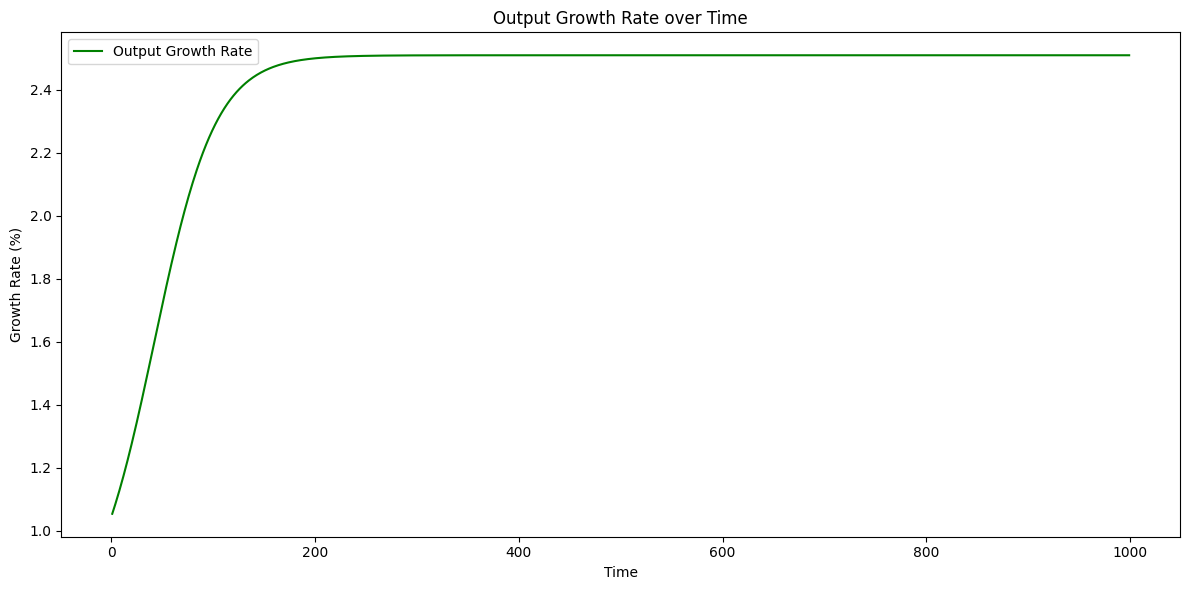

In [ ]:
# Widgets
s_widget = widgets.FloatSlider(value=0.05, min=0.0, max=1.0, step=0.01, description='Savings Rate:',style={'description_width': 'initial'},layout=Layout(width='50%'))
n_widget = widgets.FloatSlider(value=0.01, min=0.0, max=0.1, step=0.001, description='Population Growth:' ,readout_format='.3f',style={'description_width': 'initial'},layout=Layout(width='50%'))
g_widget = widgets.FloatSlider(value=0.02, min=0.0, max=0.1, step=0.001, description='Tech Progress:',readout_format='.3f',style={'description_width': 'initial'}, layout=Layout(width='50%'))
delta_widget = widgets.FloatSlider(value=0.05, min=0.0, max=0.2, step=0.01, description='Depreciation Rate:',style={'description_width': 'initial'}, layout=Layout(width='50%'))
alpha_widget = widgets.FloatSlider(value=0.35, min=0.0, max=1.0, step=0.01, description='Capital Elasticity:',style={'description_width': 'initial'}, layout=Layout(width='50%'))

# Update function
def update_model(change):
    clear_output(wait=True)
    display(container)
    solow_model_simulation_with_growth_rate(s=s_widget.value, n=n_widget.value, g=g_widget.value,
                           delta=delta_widget.value, alpha=alpha_widget.value)

# Observers
s_widget.observe(update_model, names='value')
n_widget.observe(update_model, names='value')
g_widget.observe(update_model, names='value')
delta_widget.observe(update_model, names='value')
alpha_widget.observe(update_model, names='value')

# Container
container = widgets.VBox([s_widget, n_widget, g_widget, delta_widget, alpha_widget])
display(container)

# Initial plot
solow_model_simulation_with_growth_rate()

In [ ]:
def plot_potential_gdp(s=0.20, n=0.005, delta=0.05, alpha=0.35, A=1, L=100, K=10000):
    g_range = np.arange(0.01, 0.03, 0.001)
    potential_gdp = [solow_model_final_growth_rate(s=s, n=n, g=g, delta=delta, alpha=alpha, A=A, L=L, K=K,T=100) for g in g_range]

    plt.figure(figsize=(10, 6))
    plt.plot((g_range*100), potential_gdp, label='Potential GDP Growth Rate')
    plt.xlabel('Technological Progress Rate % (g)')
    plt.ylabel('Potential GDP Growth Rate (%)')
    plt.title('Potential GDP Growth Rate vs. Technological Progress Rate')
    plt.legend()
    plt.grid(True)
    plt.show()

# Helper function to create a slider with adjusted description width
def create_slider(min, max, step, value, description, format):
    return widgets.FloatSlider(
        min=min, max=max, step=step, value=value, description=description,
        layout=Layout(width='50%'),
        style={'description_width': 'initial'},  # This is the key change
        readout_format=format,
    )

# Create sliders using the helper function
s_slider = create_slider(0, 0.5, 0.01, 0.20, 'Savings Rate (s):', '.2f')
n_slider = create_slider(0, 0.1, 0.001, 0.005, 'Population Growth Rate (n):', '.3f')
delta_slider = create_slider(0, 0.1, 0.01, 0.05, 'Depreciation Rate (delta):', '.2f')
alpha_slider = create_slider(0, 1, 0.01, 0.35, 'Capital Output Elasticity (alpha):', '.2f')
A_slider = create_slider(0, 10, 1, 1, 'Initial Technology Level (A):', '.0f')
L_slider = create_slider(50, 150, 10, 100, 'Initial Labor Force (L):', '.0f')
K_slider = create_slider(5000, 15000, 1000, 10000, 'Initial Capital Stock (K):', '.0f')


# Group the sliders into a vertical box
ui = widgets.VBox([s_slider, n_slider, delta_slider, alpha_slider])

# Define the update function as before
def update_plot(s, n, delta, alpha, A, L, K):
    plot_potential_gdp(s=s, n=n, delta=delta, alpha=alpha, A=A, L=L, K=K)

# Create the interactive output widget
out = widgets.interactive_output(update_plot, {'s': s_slider, 'n': n_slider, 'delta': delta_slider, 'alpha': alpha_slider, 'A': A_slider, 'L': L_slider, 'K': K_slider})


# Display the UI and the output
display(ui, out)

Output()

In [ ]:
# Solow model function as previously defined

# Define widgets for the Solow model parameters and CAPM inputs
s_widget = widgets.FloatSlider(value=0.05, min=0, max=1, step=0.01, description='Savings Rate (s):',style={'description_width': 'initial'}, layout=Layout(width='50%'),readout_format='.1%')
n_widget = widgets.FloatSlider(value=0.015, min=0, max=0.1, step=0.001, description='Population Growth Rate (n):', readout_format='.1%',style={'description_width': 'initial'}, layout=Layout(width='50%'))
g_widget = widgets.FloatSlider(value=0.016, min=0, max=0.1, step=0.001, description='Technological Growth Rate (g):', readout_format='.1%',style={'description_width': 'initial'}, layout=Layout(width='50%'))
delta_widget = widgets.FloatSlider(value=0.1, min=0, max=0.2, step=0.01, description='Depreciation Rate (delta):',style={'description_width': 'initial'}, layout=Layout(width='50%'),readout_format='.1%')
alpha_widget = widgets.FloatSlider(value=0.35, min=0, max=1, step=0.01, description='Capital Output Elasticity (alpha):',style={'description_width': 'initial'}, layout=Layout(width='50%'),readout_format='.1%')
beta_widget = widgets.FloatSlider(value=1, min=0, max=2, step=0.01, description='Beta:',style={'description_width': 'initial'}, layout=Layout(width='50%'))
equity_risk_premium_widget = widgets.FloatSlider(value=0.02, min=0, max=0.2, step=0.001, description='Equity Risk Premium:', readout_format='.2%',style={'description_width': 'initial'}, layout=Layout(width='50%'))
expected_inflation_widget = widgets.FloatSlider(value=0.02, min=0.01, max=0.05, step=0.001, description='Expected Inflation:', readout_format='.2%',style={'description_width': 'initial'}, layout=Layout(width='50%'))
term_premium_widget = widgets.FloatSlider(value=0.01, min=0, max=0.02, step=0.001, description='Term Premium:', readout_format='.2%',style={'description_width': 'initial'}, layout=Layout(width='50%'))
retention_rate_widget = widgets.FloatSlider(value=0.35, min=0, max=1, step=0.01, description='Retention Rate (b):',style={'description_width': 'initial'}, layout=Layout(width='50%'),readout_format='.1%')
tfp_widget = widgets.FloatSlider(value=1.1, min=0, max=5, step=0.01, description='Total Factor Productivity (tfp):', style={'description_width': 'initial'}, layout=Layout(width='50%'))

# Display widgets
display(s_widget, n_widget, g_widget, delta_widget, alpha_widget, beta_widget, equity_risk_premium_widget, expected_inflation_widget, term_premium_widget, retention_rate_widget,tfp_widget)

# Output widget for displaying results
output = widgets.Output()
display(output)
def calculate_required_return(risk_free_rate, beta, equity_risk_premium):
    return risk_free_rate + beta * (equity_risk_premium)


def update_justified_pe(*args):
    s = s_widget.value
    n = n_widget.value
    g = g_widget.value
    delta = delta_widget.value
    alpha = alpha_widget.value

    beta = beta_widget.value
    equity_risk_premium = equity_risk_premium_widget.value
    expected_inflation = expected_inflation_widget.value
    term_premium = term_premium_widget.value
    b = retention_rate_widget.value
    tfp = tfp_widget.value

    real_growth_rate = solow_model_final_growth_rate(s, n, g, delta, alpha)/100
    nominal_growth_rate = real_growth_rate + expected_inflation

    risk_free_rate = real_growth_rate + expected_inflation + term_premium
    required_return = calculate_required_return(risk_free_rate, beta, equity_risk_premium)

    earnings_growth_rate=nominal_growth_rate*tfp
    if nominal_growth_rate >= required_return:
        justified_pe_ratio = "Nominal growth rate cannot be equal to or greater than the required return."
    else:
        justified_pe_ratio = (1 - b) / (required_return - earnings_growth_rate)

    with output:
        output.clear_output()
        print(f"Justified Forward P/E Ratio: {justified_pe_ratio:.2f}")
        print(f"Real Growth Rate: {(100*real_growth_rate):.2f}")
        print(f"Nominal Growth Rate: {(100*nominal_growth_rate):.2f}")
        print(f"Risk Free Rate: {(100*risk_free_rate):.2f}")
        print(f"Required Return: {(100*required_return):.2f}")
        print(f"Earnings Growth Rate: {(100*earnings_growth_rate):.2f}")


# Attach the update function to all sliders
widgets_to_observe = [s_widget, n_widget, g_widget, delta_widget, alpha_widget, beta_widget, equity_risk_premium_widget, expected_inflation_widget, term_premium_widget, retention_rate_widget,tfp_widget]
for widget in widgets_to_observe:
    widget.observe(update_justified_pe, 'value')

update_justified_pe()  # Initialize the output

FloatSlider(value=0.05, description='Savings Rate (s):', layout=Layout(width='50%'), max=1.0, readout_format='…

FloatSlider(value=0.015, description='Population Growth Rate (n):', layout=Layout(width='50%'), max=0.1, reado…

FloatSlider(value=0.016, description='Technological Growth Rate (g):', layout=Layout(width='50%'), max=0.1, re…

FloatSlider(value=0.1, description='Depreciation Rate (delta):', layout=Layout(width='50%'), max=0.2, readout_…

FloatSlider(value=0.35, description='Capital Output Elasticity (alpha):', layout=Layout(width='50%'), max=1.0,…

FloatSlider(value=1.0, description='Beta:', layout=Layout(width='50%'), max=2.0, step=0.01, style=SliderStyle(…

FloatSlider(value=0.02, description='Equity Risk Premium:', layout=Layout(width='50%'), max=0.2, readout_forma…

FloatSlider(value=0.02, description='Expected Inflation:', layout=Layout(width='50%'), max=0.05, min=0.01, rea…

FloatSlider(value=0.01, description='Term Premium:', layout=Layout(width='50%'), max=0.02, readout_format='.2%…

FloatSlider(value=0.35, description='Retention Rate (b):', layout=Layout(width='50%'), max=1.0, readout_format…

FloatSlider(value=1.1, description='Total Factor Productivity (tfp):', layout=Layout(width='50%'), max=5.0, st…

Output()

In [ ]:
# Assuming the solow_model_final_growth_rate and calculate_required_return functions are defined

# Define widgets for the Solow model parameters and CAPM inputs
s_widget = widgets.FloatSlider(value=0.05, min=0, max=1, step=0.01, description='Savings Rate (s):',style={'description_width': 'initial'}, layout=Layout(width='50%'),readout_format='.2%')
n_widget = widgets.FloatSlider(value=0.015, min=0, max=0.1, step=0.001, description='Population Growth Rate (n):', readout_format='.1%',style={'description_width': 'initial'}, layout=Layout(width='50%'),)
delta_widget = widgets.FloatSlider(value=0.1, min=0, max=0.2, step=0.01, description='Depreciation Rate (delta):',style={'description_width': 'initial'}, layout=Layout(width='50%'),readout_format='.2%')
alpha_widget = widgets.FloatSlider(value=0.35, min=0, max=1, step=0.01, description='Capital Output Elasticity (alpha):',style={'description_width': 'initial'}, layout=Layout(width='50%'),readout_format='.2%')
beta_widget = widgets.FloatSlider(value=1, min=0, max=2, step=0.01, description='Beta:',style={'description_width': 'initial'}, layout=Layout(width='50%'))
equity_risk_premium_widget = widgets.FloatSlider(value=0.02, min=0, max=0.2, step=0.001, description='Equity Risk Premium:', readout_format='.2%',style={'description_width': 'initial'}, layout=Layout(width='50%'))
expected_inflation_widget = widgets.FloatSlider(value=0.02, min=0.01, max=0.05, step=0.001, description='Expected Inflation:', readout_format='.2%',style={'description_width': 'initial'}, layout=Layout(width='50%'))
term_premium_widget = widgets.FloatSlider(value=0.01, min=0, max=0.02, step=0.001, description='Term Premium:', readout_format='.2%',style={'description_width': 'initial'}, layout=Layout(width='50%'))
retention_rate_widget = widgets.FloatSlider(value=0.35, min=0, max=1, step=0.01, description='Retention Rate (b):',style={'description_width': 'initial'}, layout=Layout(width='50%'),readout_format='.2%')
tfp_widget = widgets.FloatSlider(value=1.1, min=0, max=5, step=0.1, description='Total Factor Productivity (tfp):', style={'description_width': 'initial'}, layout=Layout(width='50%'))


# Display widgets
display(s_widget, n_widget, delta_widget, alpha_widget, beta_widget, equity_risk_premium_widget, expected_inflation_widget, term_premium_widget, retention_rate_widget, tfp_widget)

# Output widget for displaying results and plot
output = widgets.Output()
display(output)

def plot_pe_ratio(change=None):  # Add 'change' parameter to accept the event object
    g_values = np.arange(0.015, 0.031, 0.0005)  # Technological growth rate from 1.5% to 2.5%
    pe_ratios = []

    for g in g_values:
        s = s_widget.value
        n = n_widget.value
        delta = delta_widget.value
        alpha = alpha_widget.value
        beta = beta_widget.value
        equity_risk_premium = equity_risk_premium_widget.value
        expected_inflation = expected_inflation_widget.value
        term_premium = term_premium_widget.value
        b = retention_rate_widget.value
        tfp = tfp_widget.value

        real_growth_rate = solow_model_final_growth_rate(s, n, g, delta, alpha) / 100
        nominal_growth_rate = real_growth_rate + expected_inflation

        risk_free_rate = real_growth_rate + expected_inflation + term_premium
        required_return = calculate_required_return(risk_free_rate, beta, equity_risk_premium)

        earnings_growth_rate = nominal_growth_rate * tfp
        if nominal_growth_rate >= required_return:
            pe_ratio = np.nan  # Use NaN for cases where the calculation doesn't make sense
        else:
            pe_ratio = (1 - b) / (required_return - earnings_growth_rate)
        pe_ratios.append(pe_ratio)

    with output:
        clear_output(wait=True)
        plt.figure(figsize=(10, 6))
        plt.plot(g_values * 100, pe_ratios, marker='o', linestyle='-', color='blue')
        for i, txt in enumerate(pe_ratios):# Check if index is even and value is not NaN
            if not np.isnan(txt) and i % 4 == 0:
                plt.text(g_values[i] * 100, txt, f'{txt:.2f}', fontsize=8, fontweight='bold', ha='right', va='top')
        plt.title('Justified Forward P/E Ratio vs. Technological Growth Rate')
        plt.xlabel('Technological Growth Rate (%)')
        plt.ylabel('Justified Forward P/E Ratio')
        plt.grid(True)
        plt.show()

# Attach the plot_pe_ratio function to update whenever a widget value changes
widgets_to_observe = [s_widget, n_widget, delta_widget, alpha_widget, beta_widget, equity_risk_premium_widget, expected_inflation_widget, term_premium_widget, retention_rate_widget, tfp_widget]
for widget in widgets_to_observe:
    widget.observe(plot_pe_ratio, 'value')

# Initial call to display the plot with the default values
plot_pe_ratio()

FloatSlider(value=0.05, description='Savings Rate (s):', layout=Layout(width='50%'), max=1.0, readout_format='…

FloatSlider(value=0.015, description='Population Growth Rate (n):', layout=Layout(width='50%'), max=0.1, reado…

FloatSlider(value=0.1, description='Depreciation Rate (delta):', layout=Layout(width='50%'), max=0.2, readout_…

FloatSlider(value=0.35, description='Capital Output Elasticity (alpha):', layout=Layout(width='50%'), max=1.0,…

FloatSlider(value=1.0, description='Beta:', layout=Layout(width='50%'), max=2.0, step=0.01, style=SliderStyle(…

FloatSlider(value=0.02, description='Equity Risk Premium:', layout=Layout(width='50%'), max=0.2, readout_forma…

FloatSlider(value=0.02, description='Expected Inflation:', layout=Layout(width='50%'), max=0.05, min=0.01, rea…

FloatSlider(value=0.01, description='Term Premium:', layout=Layout(width='50%'), max=0.02, readout_format='.2%…

FloatSlider(value=0.35, description='Retention Rate (b):', layout=Layout(width='50%'), max=1.0, readout_format…

FloatSlider(value=1.1, description='Total Factor Productivity (tfp):', layout=Layout(width='50%'), max=5.0, st…

Output()

In [ ]:
# Number of simulations
num_simulations = 1000
num_months = 12

# Assumed mean and standard deviation for the inputs
# Example: Technological growth rate (annualized, in decimals)
g_mean = 0.02
g_std = 0.005
# Expected inflation (annualized, in decimals)
inflation_mean = 0.02
inflation_std = 0.01
# Term premium (annualized, in decimals)
term_premium_mean = 0.005
term_premium_std = 0.002

# Other fixed inputs
s = 0.20
n = 0.005
delta = 0.05
alpha = 0.35
beta = 1
equity_risk_premium = 0.05
b = 0.6
tfp = 2

def calculate_pe_ratio(g, inflation, term_premium):
    real_growth_rate = solow_model_final_growth_rate(s, n, g, delta, alpha) / 100
    nominal_growth_rate = real_growth_rate + inflation
    risk_free_rate = real_growth_rate + inflation + term_premium
    required_return = calculate_required_return(risk_free_rate, beta, equity_risk_premium)
    earnings_growth_rate = nominal_growth_rate * tfp
    if nominal_growth_rate >= required_return:
        return np.nan
    else:
        return (1 - b) / (required_return - earnings_growth_rate), earnings_growth_rate



# Function to run Monte Carlo simulation
def run_monte_carlo_simulation(g_mean, g_std, inflation_mean, inflation_std, term_premium_mean, term_premium_std, s, n, delta, alpha, beta, equity_risk_premium, b, tfp, num_simulations=10000, num_months=1):
    pe_ratios = np.zeros((num_simulations, num_months))
    earnings_growth_rates = np.zeros((num_simulations, num_months))

    for i in range(num_simulations):
        for month in range(num_months):
            g = np.random.normal(g_mean, g_std)
            inflation = np.random.normal(inflation_mean, inflation_std)
            term_premium = np.random.normal(term_premium_mean, term_premium_std)

            pe_ratio, earnings_growth_rate = calculate_pe_ratio(g, inflation, term_premium)
            pe_ratios[i, month] = pe_ratio
            earnings_growth_rates[i, month] = earnings_growth_rate

    return pe_ratios, earnings_growth_rates


# Define the required widgets for the inputs
s_widget = widgets.FloatSlider(value=0.05, min=0, max=0.2, step=0.01, description='Savings Rate (s):', style={'description_width': 'initial'}, layout=Layout(width='50%'),readout_format='.2%')
n_widget = widgets.FloatSlider(value=0.011, min=0, max=0.03, step=0.001, description='Population Growth Rate (n):', style={'description_width': 'initial'}, layout=Layout(width='50%'),readout_format='.2%')
delta_widget = widgets.FloatSlider(value=0.05, min=0.01, max=0.1, step=0.01, description='Depreciation Rate (delta):', style={'description_width': 'initial'}, layout=Layout(width='50%'),readout_format='.2%')
alpha_widget = widgets.FloatSlider(value=0.35, min=0.25, max=0.5, step=0.05, description='Capital Output Elasticity (alpha):', style={'description_width': 'initial'}, layout=Layout(width='50%'),readout_format='.2%')
beta_widget = widgets.FloatSlider(value=1, min=0.5, max=1.5, step=0.1, description='Beta:', style={'description_width': 'initial'}, layout=Layout(width='50%'))
equity_risk_premium_widget = widgets.FloatSlider(value=0.025, min=0.01, max=0.1, step=0.001, description='Equity Risk Premium:', style={'description_width': 'initial'}, layout=Layout(width='50%'),readout_format='.2%')
b_widget = widgets.FloatSlider(value=0.35, min=0.1, max=0.6, step=0.05, description='Retention Rate (b):', style={'description_width': 'initial'}, layout=Layout(width='50%'),readout_format='.2%')
tfp_widget = widgets.FloatSlider(value=1.1, min=1, max=2, step=0.1, description='Earnings Growth Factor:', style={'description_width': 'initial'}, layout=Layout(width='50%'))
# Widgets for the variables with assumed distributions
g_mean_widget = widgets.FloatSlider(value=0.015, min=0.01, max=0.03, step=0.001, description='Technological Growth Rate Mean (g_mean):', style={'description_width': 'initial'}, layout=Layout(width='50%'),readout_format='.2%')
g_std_widget = widgets.FloatSlider(value=0.0005, min=0, max=0.001, step=0.0001, description='Technological Growth Rate Std Dev (g_std):', style={'description_width': 'initial'}, layout=Layout(width='50%'),readout_format='.4%')
inflation_mean_widget = widgets.FloatSlider(value=0.02, min=0.01, max=0.03, step=0.001, description='Inflation Mean:', style={'description_width': 'initial'}, layout=Layout(width='50%'),readout_format='.2%')
inflation_std_widget = widgets.FloatSlider(value=0.0001, min=0, max=0.001, step=0.0001, description='Inflation Std Dev:', style={'description_width': 'initial'}, layout=Layout(width='50%'),readout_format='.4%')
term_premium_mean_widget = widgets.FloatSlider(value=0.005, min=0.001, max=0.02, step=0.001, description='Term Premium Mean:', style={'description_width': 'initial'}, layout=Layout(width='50%'),readout_format='.2%')
term_premium_std_widget = widgets.FloatSlider(value=0.0001, min=0, max=0.001, step=0.0001, description='Term Premium Std Dev:', style={'description_width': 'initial'}, layout=Layout(width='50%'),readout_format='.4%')

# Output widget for the plot
output = widgets.Output()

# Display widgets
display_widgets = [s_widget, n_widget, delta_widget, alpha_widget, beta_widget, equity_risk_premium_widget, b_widget, tfp_widget,
                   g_mean_widget, g_std_widget, inflation_mean_widget, inflation_std_widget, term_premium_mean_widget, term_premium_std_widget]
for widget in display_widgets:
    display(widget)

display(output)

# This function should encapsulate the previously shown Monte Carlo simulation logic, adjusted to use widget values.
def update_plot(change):
    pe_ratios, earnings_growth_rates = run_monte_carlo_simulation(
        g_mean=g_mean_widget.value,
        g_std=g_std_widget.value,
        inflation_mean=inflation_mean_widget.value,
        inflation_std=inflation_std_widget.value,
        term_premium_mean=term_premium_mean_widget.value,
        term_premium_std=term_premium_std_widget.value,
        s=s_widget.value,
        n=n_widget.value,
        delta=delta_widget.value,
        alpha=alpha_widget.value,
        beta=beta_widget.value,
        equity_risk_premium=equity_risk_premium_widget.value,
        b=b_widget.value,
        tfp=tfp_widget.value
    )

    final_month_pe_ratios = pe_ratios[:, -1][~np.isnan(pe_ratios[:, -1])]  # Filter out NaNs
    final_month_earnings_growth_rates = earnings_growth_rates[:, -1][~np.isnan(earnings_growth_rates[:, -1])] * 100  # Convert to percentage and filter out NaNs

    pe_mean, pe_std = np.mean(final_month_pe_ratios), np.std(final_month_pe_ratios)
    earnings_mean, earnings_std = np.mean(final_month_earnings_growth_rates), np.std(final_month_earnings_growth_rates)


    with output:
        clear_output(wait=True)
        fig, axs = plt.subplots(1, 2, figsize=(15, 4))

        axs[0].hist(final_month_pe_ratios, bins=30, alpha=0.75, color='blue')
        axs[0].axvline(pe_mean, color='k', linestyle='dashed', linewidth=1)
        axs[0].axvline(pe_mean + 2 * pe_std, color='r', linestyle='dashed', linewidth=1)
        axs[0].axvline(pe_mean - 2 * pe_std, color='r', linestyle='dashed', linewidth=1)
        axs[0].set_title('Distribution of Simulated P/E Ratios')
        axs[0].set_xlabel('P/E Ratio')
        axs[0].set_ylabel('Frequency')
        axs[0].grid(True)

        # Plot Earnings Growth Rates
        axs[1].hist(final_month_earnings_growth_rates, bins=30, alpha=0.75, color='green')
        axs[1].axvline(earnings_mean, color='k', linestyle='dashed', linewidth=1)
        axs[1].axvline(earnings_mean + 2 * earnings_std, color='r', linestyle='dashed', linewidth=1)
        axs[1].axvline(earnings_mean - 2 * earnings_std, color='r', linestyle='dashed', linewidth=1)
        axs[1].set_title('Distribution of Simulated Earnings Growth Rates')
        axs[1].set_xlabel('Earnings Growth Rate (%)')
        axs[1].set_ylabel('Frequency')
        axs[1].grid(True)

        plt.tight_layout()
        plt.show()

# Trigger the update_plot function whenever any widget's value changes
for widget in display_widgets:
    widget.observe(update_plot, names='value')

# Initial call to display the plot with default widget values
update_plot(None)

FloatSlider(value=0.05, description='Savings Rate (s):', layout=Layout(width='50%'), max=0.2, readout_format='…

FloatSlider(value=0.011, description='Population Growth Rate (n):', layout=Layout(width='50%'), max=0.03, read…

FloatSlider(value=0.05, description='Depreciation Rate (delta):', layout=Layout(width='50%'), max=0.1, min=0.0…

FloatSlider(value=0.35, description='Capital Output Elasticity (alpha):', layout=Layout(width='50%'), max=0.5,…

FloatSlider(value=1.0, description='Beta:', layout=Layout(width='50%'), max=1.5, min=0.5, style=SliderStyle(de…

FloatSlider(value=0.025, description='Equity Risk Premium:', layout=Layout(width='50%'), max=0.1, min=0.01, re…

FloatSlider(value=0.35, description='Retention Rate (b):', layout=Layout(width='50%'), max=0.6, min=0.1, reado…

FloatSlider(value=1.1, description='Earnings Growth Factor:', layout=Layout(width='50%'), max=2.0, min=1.0, st…

FloatSlider(value=0.015, description='Technological Growth Rate Mean (g_mean):', layout=Layout(width='50%'), m…

FloatSlider(value=0.0005, description='Technological Growth Rate Std Dev (g_std):', layout=Layout(width='50%')…

FloatSlider(value=0.02, description='Inflation Mean:', layout=Layout(width='50%'), max=0.03, min=0.01, readout…

FloatSlider(value=0.0001, description='Inflation Std Dev:', layout=Layout(width='50%'), max=0.001, readout_for…

FloatSlider(value=0.005, description='Term Premium Mean:', layout=Layout(width='50%'), max=0.02, min=0.001, re…

FloatSlider(value=0.0001, description='Term Premium Std Dev:', layout=Layout(width='50%'), max=0.001, readout_…

Output()